# First Exercise

## Plotting and testing the data

In [22]:
from statsmodels.tsa.arima_process import ArmaProcess
from time_series_tools.random_walk import stationary_test
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

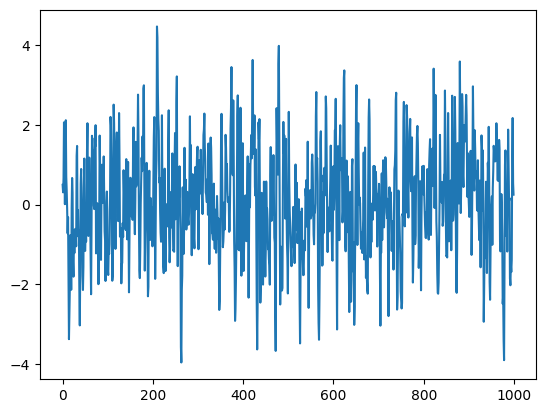

In [3]:
plt.plot(MA2_process)

In [4]:
adfuller(MA2_process)

(-14.005444309194495,
 3.7956016167135026e-26,
 3,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 2739.7287503892885)

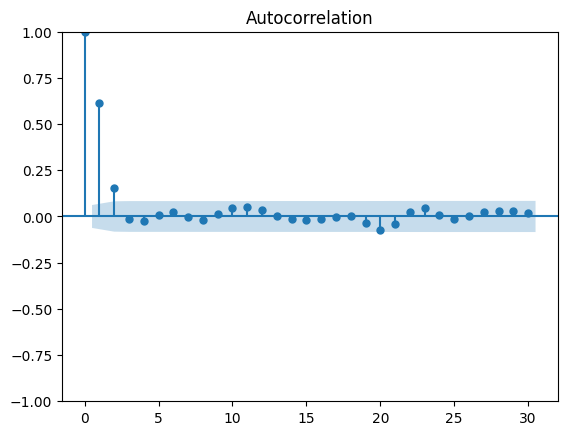

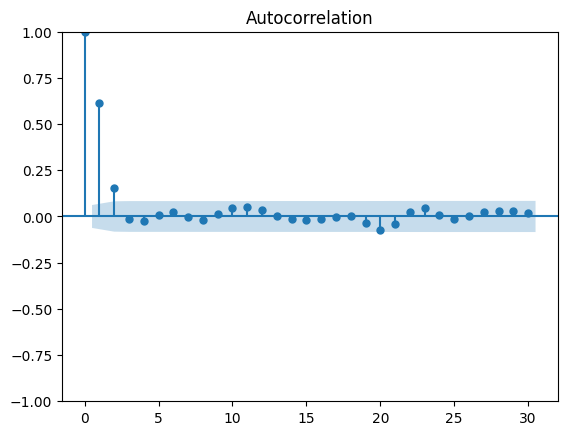

In [5]:
plot_acf(MA2_process)

## Split and Training

In [6]:
df = pd.DataFrame(MA2_process)
df_train, df_test =  df[:800], df[800:]

In [7]:
# Naive forecasting
# Mean
mean_forecast = np.mean(df_train)*np.ones(len(df_test))

# Last_value
last_value_forecast = list(df_train)[-1]*np.ones(len(df_test))

In [10]:
def recursive_forecast(df, train_len, window):
    test_len = len(df) - train_len
    MA_forecast = []
    for i in range(train_len, len(df), window):
        model = SARIMAX(df[:i], order=(0,0,2))
        res = model.fit(disp=False)
        predictions = res.get_prediction(0, i + window - 1)
        oos_pred = predictions.predicted_mean.iloc[-window:]
        MA_forecast.extend(oos_pred)
    return MA_forecast

In [12]:
#MA(2) 
ma_forecast = recursive_forecast(df,800, 2)

## Plot of the forecasts

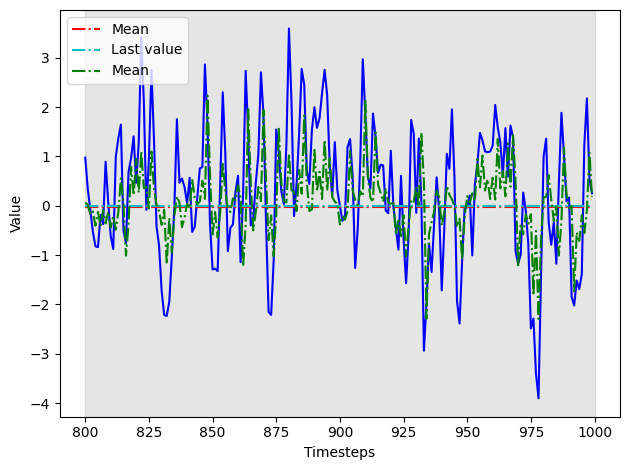

In [21]:
fig, ax = plt.subplots()

ax.plot(df[800:], 'b-')
ax.plot(range(800,1000),mean_forecast, 'r-.', label='Mean')
ax.plot(range(800,1000),last_value_forecast, 'c-.', label='Last value')
ax.plot(range(800,1000),ma_forecast, 'g-.', label='Mean')


ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

<BarContainer object of 3 artists>

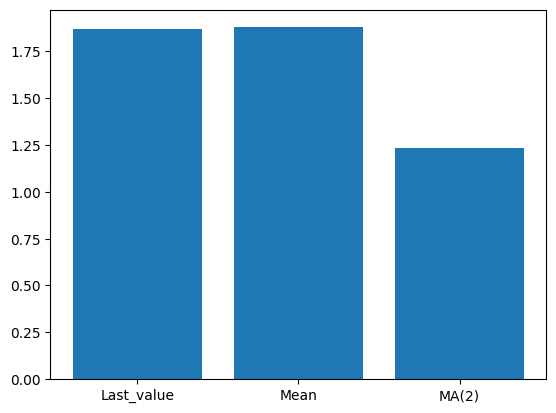

In [23]:
plt.bar(['Last_value', 'Mean', 'MA(2)'],[mean_squared_error(df[800:], forecast) for forecast in [last_value_forecast, mean_forecast, ma_forecast]])